In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import json

%matplotlib inline

In [21]:
iris = pd.read_csv("../data/iris.csv")
del iris["Id"]
iris.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
39,5.1,3.4,1.5,0.2,Iris-setosa
117,7.7,3.8,6.7,2.2,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
73,6.1,2.8,4.7,1.2,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
87,6.3,2.3,4.4,1.3,Iris-versicolor


In [23]:
iris.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [25]:
species = iris.Species.unique() 
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

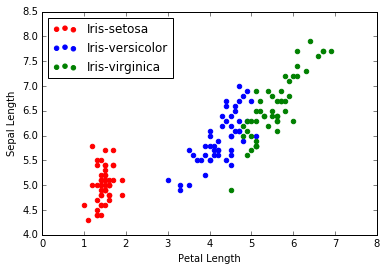

In [30]:
colors = ["red", "blue", "green"]
for i, v in enumerate(species):
    df = iris[iris.Species == v]
    plt.scatter(df["PetalLengthCm"],df["SepalLengthCm"], color = colors[i], label = v)
plt.legend(loc = "upper left")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")

In [32]:
y = np.where(iris.Species == "Iris-virginica", 1, 0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

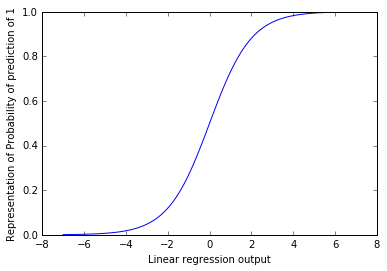

In [68]:
p = np.linspace(-7, 7, 100)
def phi(p):
    return 1 / (1 + np.exp(-p))
plt.plot(p, phi(p))
plt.xlabel("Linear regression output")
plt.ylabel("Representation of Probability of prediction of 1")

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from mlxtend.plotting import plot_decision_regions

In [55]:
X = iris.iloc[:, [0, 2]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
X_train.shape

(105, 2)

In [56]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
outcome = pd.DataFrame({"actual": y_test,"pred": y_test_pred}) 
outcome["match"] = outcome.actual == outcome.pred
outcome

,actual,pred,match
0,0,0,True
1,0,1,False
2,0,0,True
3,0,0,True
4,0,0,True
5,1,1,True
6,0,0,True
7,0,0,True
8,0,0,True
9,1,1,True


In [57]:
accuracy_score(y_test, y_test_pred)

0.8666666666666667

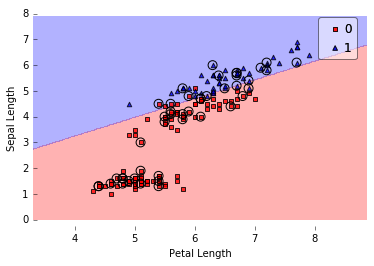

In [61]:
plot_decision_regions(X, y, lr, X_highlight=X_test)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")

In [63]:
confusion_matrix(y_test, y_test_pred)

array([[27,  3],
       [ 3, 12]])

In [65]:
pd.Series(y_test).value_counts()

0    30
1    15
dtype: int64

In [67]:
(27 + 12) / 45

0.8666666666666667

In [81]:
y_test_prob = lr.predict_proba(X_test)
print(y_test_prob.shape)
y_test_pred_new = np.where(y_test_prob[:, 1] > 0.8, 1, 0)
confusion_matrix(y_test, y_test_pred_new)

(45, 2)


array([[30,  0],
       [ 9,  6]])

In [72]:
accuracy_score(y_test, y_test_pred_new)

0.80000000000000004

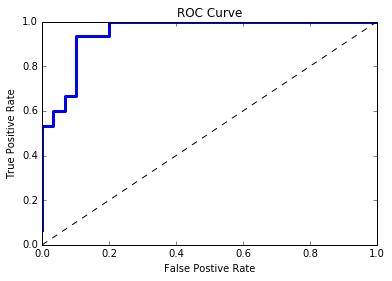

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, [1]])

plt.plot(fpr, tpr, linewidth = 3)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot([0,1], [0,1], ls = "--", color = "k")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

In [78]:
roc_auc_score(y_test, lr.predict_proba(X_test)[:, [1]])

0.95333333333333337

In [82]:
from sklearn.model_selection import cross_val_score

In [85]:
scores = cross_val_score(cv=5, scoring="accuracy", estimator=lr, X=X_train, y= y_train)
scores.mean(), scores.std()

(0.96190476190476182, 0.076190476190476183)

In [89]:
X = iris.values[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
print(X_train.shape)
lr = LogisticRegression(C = 10)
scores = cross_val_score(cv=5, scoring="accuracy", estimator=lr, X=X_train, y= y_train)
scores.mean(), scores.std()

(0.9804761904761905, 0.023923536546819966)

In [105]:
lr.coef_

array([[ -71.22120665,  -67.02278899,  125.26815037,  102.02849872]])

In [102]:
params = 10 ** np.linspace(-5, 5, 100)
means, stds = [], []
coefs = []

for i, p in enumerate(params):
    lr = LogisticRegression(C = p)
    scores = cross_val_score(cv=5, scoring="accuracy", estimator=lr, X=X_train, y= y_train)
    means.append(scores.mean())
    stds.append(scores.std())
    lr.fit(X_train, y_train)
    coefs.append(lr.coef_[0])

means = np.array(means)
stds = np.array(stds)

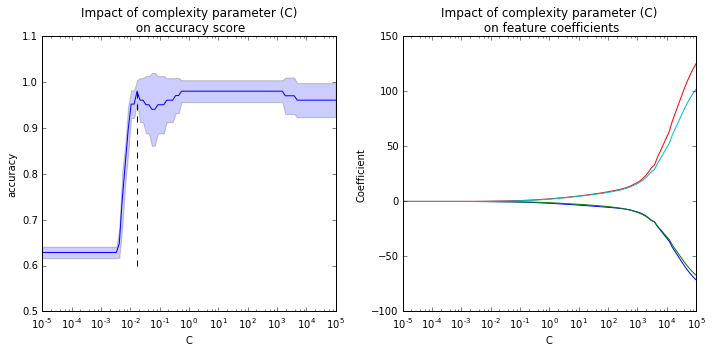

In [126]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(params, means)
plt.fill_between(params, means + stds, means - stds, alpha = 0.2)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.vlines([0.017073526474706904], ymin= 0.6, ymax=0.99, linestyles = "--")
plt.title("Impact of complexity parameter (C)\n on accuracy score")

plt.subplot(1, 2, 2)
plt.plot(params, coefs)
plt.xlabel("C")
plt.ylabel("Coefficient")
plt.xscale("log")
plt.title("Impact of complexity parameter (C)\n on feature coefficients")

plt.tight_layout()

In [110]:
lr = LogisticRegression(C = 10)
lr.fit(X_train, y_train)
lr.coef_[0]

array([-3.33379941, -2.59403857,  4.94953816,  4.69278023])

In [111]:
lr = LogisticRegression(C = 1e-4)
lr.fit(X_train, y_train)
lr.coef_[0]

array([-0.00461366, -0.00407757,  0.00179773,  0.00141754])

In [112]:
from sklearn.model_selection import GridSearchCV

In [114]:
param_grid = [
    {"C": params}
]
gs = GridSearchCV(cv=5, estimator = lr, scoring="accuracy", param_grid= param_grid)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': array([  1.00000e-05,   1.26186e-05, ...,   7.92483e+04,   1.00000e+05])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [117]:
best = gs.best_estimator_

In [116]:
gs.best_params_

{'C': 0.017073526474706904}

In [118]:
best.score(X_test, y_test)

0.9555555555555556

In [119]:
best.coef_[0]

array([-0.19793716, -0.23586547,  0.34446392,  0.2106246 ])

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
X = iris.values[:, [1, 3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
print(X_train.shape)

(105, 2)


In [131]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

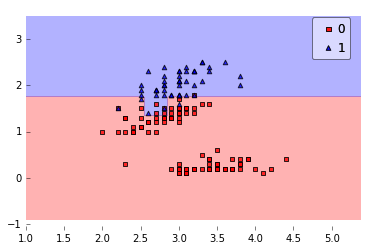

In [132]:
plot_decision_regions(X, y, tree)

In [133]:
tree.score(X_test, y_test)

0.8666666666666667

In [134]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.93333333333333335

In [135]:
tree.feature_importances_

array([ 0.04601479,  0.95398521])

Accuracy: 0.933333333333


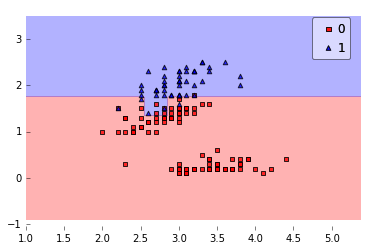

In [139]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=4)
forest.fit(X_train, y_train)
print("Accuracy:", forest.score(X_test, y_test))
plot_decision_regions(X, y, tree)

accuracy 0.955555555556


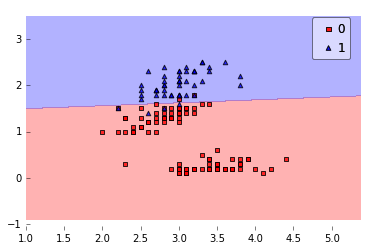

In [141]:
from sklearn.svm import SVC
svc = SVC(gamma=10, kernel="linear")
svc.fit(X_train, y_train)
print("accuracy", svc.score(X_test, y_test))
plot_decision_regions(X, y, svc)